In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re


In [2]:
df=pd.read_csv("~/Downloads/summary.csv",sep=",")


In [3]:
sns.set(style="whitegrid")

In [4]:
df["name"]
df.keys()

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'dockQ',
       'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long', 'med',
       'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA', 'longB',
       'medB', 'longPPVB', 'medPPVB', 'auc', 'evalue', 'seqid', 'rank'],
      dtype='object')

In [5]:

df["code"]=df["name"].str[:4]
df["CODE"]=df["code"]
df["params"]=df["JHparams"]

In [6]:
r=re.compile("^PDB|^pdb|^TMd|gramm")
datasets=df.JHparams.unique()
notRosettaset=list(filter(r.match, datasets))
df2=df.loc[~df.JHparams.isin(notRosettaset)].copy()
df2.JHparams="trRosetta"
df2.params="trRosetta"
df2

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,medB,longPPVB,medPPVB,auc,evalue,seqid,rank,code,CODE,params
0,1ay7_u1_A-1ay7_u2_A,trRosetta,97,90,1060.0,1485,2034,0.298,0.222,3.561,...,116,0.985,0.966,0.40,9999.0,0.000,1,1ay7,1ay7,trRosetta
1,1ay7_u2_A-1ay7_u1_A,trRosetta,90,97,1060.0,2034,1485,0.254,0.278,4.395,...,150,0.960,0.987,0.36,9999.0,0.000,2,1ay7,1ay7,trRosetta
2,1b27_u1_A-1b27_u2_A,trRosetta,109,90,733.0,1484,2034,0.223,0.120,4.508,...,113,0.992,0.965,0.46,4.3,50.000,1,1b27,1b27,trRosetta
3,1b27_u2_A-1b27_u1_A,trRosetta,90,109,733.0,2034,1484,0.231,0.160,4.840,...,154,0.971,0.981,0.46,4.3,50.000,2,1b27,1b27,trRosetta
4,1bdj_u1_A-1bdj_u2_A,trRosetta,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,92,0.996,1.000,0.00,9999.0,0.000,1,1bdj,1bdj,trRosetta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,4y5o_u1_A-4y5o_u2_A,trRosetta,94,85,34.0,0.,0.,0.055,0.000,11.394,...,41,0.972,0.951,0.00,9999.0,0.000,1,4y5o,4y5o,trRosetta
7248,4zfr_u1_A-4zfr_u2_A,trRosetta,186,77,12.0,0.,0.,0.048,0.000,14.464,...,37,0.846,0.946,0.09,9999.0,0.000,1,4zfr,4zfr,trRosetta
7249,5brr_u1_A-5brr_u2_A,trRosetta,378,266,107.0,0.,0.,0.009,0.000,18.458,...,306,0.995,1.000,0.00,236.0,66.667,1,5brr,5brr,trRosetta
7250,5cec_u1_A-5cec_u2_A,trRosetta,403,191,7.0,0.,0.,0.011,0.000,20.074,...,109,0.737,0.367,0.00,197.0,33.333,1,5cec,5cec,trRosetta


In [7]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2',

In [8]:
# Divide data into datasets


df["tmAB"]=df[["tmA","tmB"]].mean(axis=1)
df["msaAB"]=df[["msaA","msaB"]].mean(axis=1)
df["tmAB_max"]=df[["tmA","tmB"]].max(axis=1)
df["msaAB_max"]=df[["msaA","msaB"]].max(axis=1)
df["tmAB_min"]=df[["tmA","tmB"]].min(axis=1)
df["msaAB_min"]=df[["msaA","msaB"]].min(axis=1)
df["numcorrect"]=df["longPPV"]*df["long"]
df["len"]=df["lenA"]+df["lenB"]

codes=df.code.unique()
df_mean=df.groupby(["JHparams","code"]).mean()
df_max=df.groupby(["JHparams","code"]).max()
df_min=df.groupby(["JHparams","code"]).min()
df_first=df.loc[df["rank"]==1]

In [9]:
df


,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.298,0.222,3.561,...,1ay7,-N 3 --cpu 8,0.828190,NaN,0.84625,2034,0.81013,1485,53.985,187
1,1ay7_u2_A-1ay7_u1_A,-N 3 --cpu 8,90,97,1060.0,2034,1485,0.254,0.278,4.395,...,1ay7,-N 3 --cpu 8,0.816405,NaN,0.84123,2034,0.79158,1485,43.992,187
2,1b27_u1_A-1b27_u2_A,-N 3 --cpu 8,109,90,733.0,1484,2034,0.223,0.120,4.508,...,1b27,-N 3 --cpu 8,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
3,1b27_u2_A-1b27_u1_A,-N 3 --cpu 8,90,109,733.0,2034,1484,0.231,0.160,4.840,...,1b27,-N 3 --cpu 8,0.805310,NaN,0.82261,2034,0.78801,1484,46.020,199
4,1bdj_u1_A-1bdj_u2_A,-N 3 --cpu 8,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,1bdj,-N 3 --cpu 8,0.861435,NaN,0.92240,349880,0.80047,23051,0.000,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19521,4y5o_u1_A-4y5o_u2_A,trRosetta,94,85,34.0,0.,0.,0.055,0.000,11.394,...,4y5o,trRosetta,0.568465,NaN,0.71099,0.,0.42594,0.,0.000,179
19522,4zfr_u1_A-4zfr_u2_A,trRosetta,186,77,12.0,0.,0.,0.048,0.000,14.464,...,4zfr,trRosetta,0.505235,NaN,0.64391,0.,0.36656,0.,3.000,263
19523,5brr_u1_A-5brr_u2_A,trRosetta,378,266,107.0,0.,0.,0.009,0.000,18.458,...,5brr,trRosetta,0.332210,NaN,0.38444,0.,0.27998,0.,468.000,644
19524,5cec_u1_A-5cec_u2_A,trRosetta,403,191,7.0,0.,0.,0.011,0.000,20.074,...,5cec,trRosetta,0.508770,NaN,0.70983,0.,0.30771,0.,2.006,594


In [10]:
datasets=df.JHparams.unique()
data_mean={}
data_max={}
data_min={}
for d in datasets:
    data_mean[d]=df.loc[df.JHparams==d].groupby(["code"]).mean()
    data_max[d]=df.loc[df.JHparams==d].groupby(["code"]).max()
    data_min[d]=df.loc[df.JHparams==d].groupby(["code"]).min()


In [11]:
df.loc[ (df.JHparams=="trRosetta")  & (df["rank"]==1)]

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
15942,1ay7_u1_A-1ay7_u2_A,trRosetta,97,90,1060.0,1485,2034,0.298,0.222,3.561,...,1ay7,trRosetta,0.828190,NaN,0.84625,2034,0.81013,1485,53.985,187
15944,1b27_u1_A-1b27_u2_A,trRosetta,109,90,733.0,1484,2034,0.223,0.120,4.508,...,1b27,trRosetta,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
15946,1bdj_u1_A-1bdj_u2_A,trRosetta,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,1bdj,trRosetta,0.861435,NaN,0.92240,349880,0.80047,23051,0.000,247
15948,1buh_u1_A-1buh_u2_A,trRosetta,291,72,1177.0,555226,1820,0.000,0.000,523.917,...,1buh,trRosetta,0.560760,NaN,0.73259,555226,0.38893,1820,0.000,363
15950,1bvn_u1_A-1bvn_u2_A,trRosetta,496,75,95.0,52623,123,0.006,0.000,27.357,...,1bvn,trRosetta,0.619740,NaN,0.70905,52623,0.53043,123,0.000,571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19521,4y5o_u1_A-4y5o_u2_A,trRosetta,94,85,34.0,0.,0.,0.055,0.000,11.394,...,4y5o,trRosetta,0.568465,NaN,0.71099,0.,0.42594,0.,0.000,179
19522,4zfr_u1_A-4zfr_u2_A,trRosetta,186,77,12.0,0.,0.,0.048,0.000,14.464,...,4zfr,trRosetta,0.505235,NaN,0.64391,0.,0.36656,0.,3.000,263
19523,5brr_u1_A-5brr_u2_A,trRosetta,378,266,107.0,0.,0.,0.009,0.000,18.458,...,5brr,trRosetta,0.332210,NaN,0.38444,0.,0.27998,0.,468.000,644
19524,5cec_u1_A-5cec_u2_A,trRosetta,403,191,7.0,0.,0.,0.011,0.000,20.074,...,5cec,trRosetta,0.508770,NaN,0.70983,0.,0.30771,0.,2.006,594


In [12]:
df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2',

In [13]:
data_first={}
data_second={}
for d in datasets:
    data_first[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==1)]
    data_second[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==2)]
data_first[datasets[1]]

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
436,1ay7_u1_A-1ay7_u2_A,confold,97,90,1060.0,1485,2034,0.337,0.500,4.038,...,1ay7,confold,0.596110,NaN,0.63915,2034,0.55307,1485,53.985,187
441,1b27_u1_A-1b27_u2_A,confold,109,90,733.0,1484,2034,0.056,0.040,10.498,...,1b27,confold,0.450565,NaN,0.60440,2034,0.29673,1484,49.025,199
446,1bvn_u1_A-1bvn_u2_A,confold,496,75,95.0,52623,123,0.010,0.000,18.578,...,1bvn,confold,0.313675,NaN,0.33139,52623,0.29596,123,0.000,571
451,1dfj_u1_A-1dfj_u2_A,confold,457,125,4.0,377296,1273,0.016,0.011,20.677,...,1dfj,confold,0.302560,NaN,0.34193,377296,0.26319,1273,0.000,582
456,1gcq_u1_A-1gcq_u2_A,confold,66,57,1365.0,77497,77704,0.022,0.000,10.381,...,1gcq,confold,0.283870,NaN,0.28721,77704,0.28053,77497,71.760,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,4txv_u1_A-4txv_u2_A,confold,177,139,4953.0,120607,10071,0.010,0.000,18.057,...,4txv,confold,0.572305,NaN,0.59428,120607,0.55033,10071,0.000,316
831,4xhu_u1_A-4xhu_u2_A,confold,352,95,410.0,8381,307,0.020,0.000,16.234,...,4xhu,confold,0.361400,NaN,0.47265,8381,0.25015,307,0.000,447
836,4xkl_u1_A-4xkl_u2_A,confold,76,34,1262.0,37951,761,0.022,0.000,12.861,...,4xkl,confold,0.356220,NaN,0.51666,761,0.19578,37951,0.000,110
841,4xs0_u1_A-4xs0_u2_A,confold,147,141,3395.0,8885,8771,0.098,0.222,15.277,...,4xs0,confold,0.638185,NaN,0.64247,8885,0.63390,8771,224.928,288


In [14]:
datasets


array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2',

In [15]:
df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
df_max

name  lenA  lenB     msa    msaA  \
JHparams                code                                                    
-N 1 -E 1.e-10 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97     2.0     960   
                        1b27  1b27_u2_A-1b27_u1_A   109   109    35.0      44   
                        1bdj  1bdj_u2_A-1bdj_u1_A   129   129   201.0   29395   
                        1buh  1buh_u2_A-1buh_u1_A   291   291   899.0  255874   
                        1bvn  1bvn_u2_A-1bvn_u1_A   496   496     7.0       6   
...                                           ...   ...   ...     ...     ...   
trRosetta               4zfr  4zfr_u2_A-4zfr_u1_A   186   186  1358.0    9290   
                        5brr  5brr_u2_A-5brr_u1_A   378   378   611.0   45636   
                        5cec  5cec_u2_A-5cec_u1_A   403   403  1594.0   59695   
                        5cra  5cra_u2_A-5cra_u1_A   193   193     1.0   42026   
                        5eg3  5eg3_u2_A-5eg3_u1_A   303   303   499.0  565997   

                                msaB  dockQ   fnat     iRMS      LRMS  ...  \
JHparams                code                                           ...   
-N 1 -E 1.e-10 --cpu 8  1ay7     960  0.044  0.083   15.615    44.621  ...   
                        1b27      44  0.008  0.000   99.396   197.381  ...   
                        1bdj   29395  0.024  0.000   17.785    35.086  ...   
                        1buh  255874  0.061  0.000  491.316   982.230  ...   
                        1bvn       6  0.038  0.000   19.311    40.949  ...   
...                              ...    ...    ...      ...       ...  ...   
trRosetta               4zfr    9290  0.048  0.000  291.376   659.927  ...   
                        5brr   45636  0.035  0.073  642.702  1343.860  ...   
                        5cec   59695  0.050  0.075  732.223  1486.764  ...   
                        5cra   42026  0.103  0.000   22.323    60.172  ...   
                        5eg3  565997  0.016  0.000  542.531  1105.630  ...   

                              CODE                   params      tmAB  msaAB  \
JHparams                code                                                   
-N 1 -E 1.e-10 --cpu 8  1ay7  1ay7  -N 1 -E 1.e-10 --cpu 8   0.468725    NaN   
                        1b27  1b27  -N 1 -E 1.e-10 --cpu 8   0.662735    NaN   
                        1bdj  1bdj  -N 1 -E 1.e-10 --cpu 8   0.824210    NaN   
                        1buh  1buh  -N 1 -E 1.e-10 --cpu 8   0.650535    NaN   
                        1bvn  1bvn  -N 1 -E 1.e-10 --cpu 8   0.313205    NaN   
...                            ...                      ...       ...    ...   
trRosetta               4zfr  4zfr                trRosetta  0.862735    NaN   
                        5brr  5brr                trRosetta  0.848585    NaN   
                        5cec  5cec                trRosetta  0.782885    NaN   
                        5cra  5cra                trRosetta  0.684675    NaN   
                        5eg3  5eg3                trRosetta  0.833605    NaN   

                              tmAB_max  msaAB_max  tmAB_min  msaAB_min  \
JHparams                code                                             
-N 1 -E 1.e-10 --cpu 8  1ay7   0.56969        960   0.36776         46   
                        1b27   0.66638         44   0.65909        272   
                        1bdj   0.84941      29395   0.79901        235   
                        1buh   0.72158     255874   0.58000       1676   
                        1bvn   0.33372          6   0.29684       2041   
...                                ...        ...       ...        ...   
trRosetta               4zfr   0.90969       9290   0.81578      38386   
                        5brr   0.97832      45636   0.84460        196   
                        5cec   0.86787      59695   0.71169     312612   
                        5cra   0.91652      42026   0.45283         11   
                        5eg3   0.86145     5659

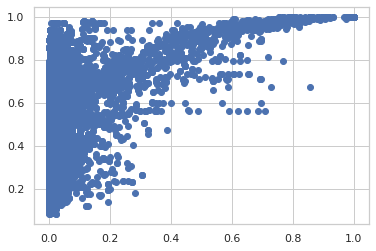

In [16]:

plt.scatter(df.dockQ,df.mm)


Text(0, 0.5, 'dockQ')

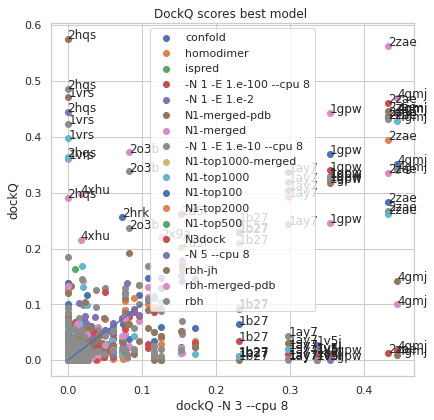

In [17]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    if d=="trRosetta":continue   
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4] # +d
        except:
            sstr=df_merged.name_y[i][0:4] #+d
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.1]
y=[0,0.1]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores best model ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'numcorrect')

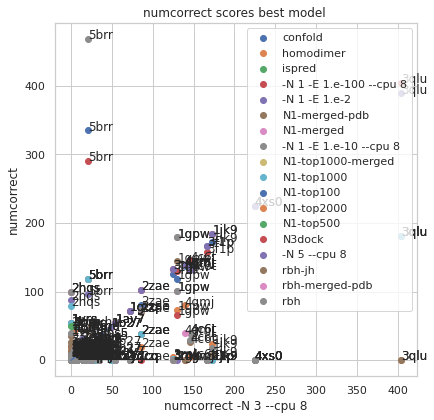

In [18]:
cutoff=5
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue 
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.numcorrect_x,df_merged.numcorrect_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.numcorrect_x[i]> cutoff or df_merged.numcorrect_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.numcorrect_x[i], df_merged.numcorrect_y[i]))
x=[0,50]
y=[0,50]
plt.plot(x,y)
ax.legend()
ax.set_title("numcorrect scores best model ")
ax.set_xlabel("numcorrect "+str(datasets[0]))
ax.set_ylabel("numcorrect")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

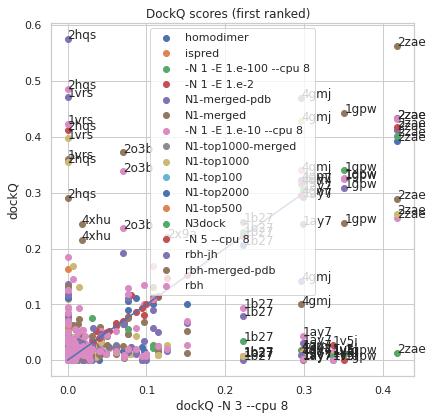

In [19]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

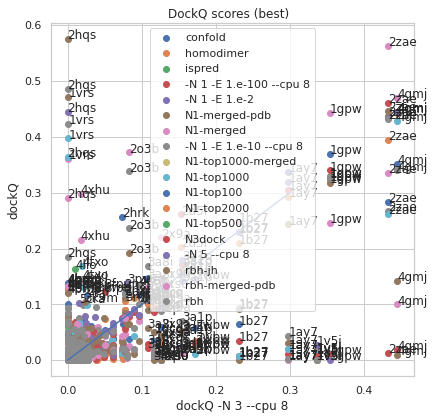

In [20]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

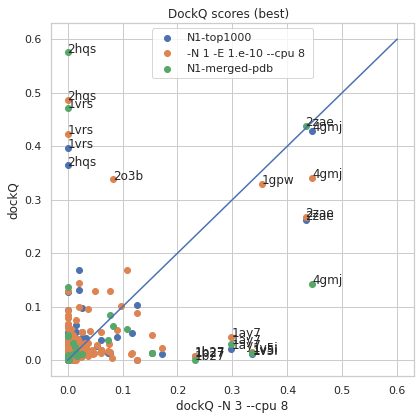

In [21]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["N1-top1000","-N 1 -E 1.e-10 --cpu 8 ","N1-merged-pdb"]:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.6]
y=[0,0.6]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [22]:
data_max.keys()

dict_keys(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb', 'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock', '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-re

Text(0, 0.5, 'dockQ trRosetta')

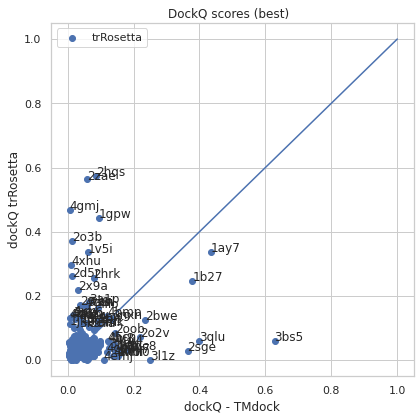

In [23]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-double"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - TMdock")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ trRosetta')

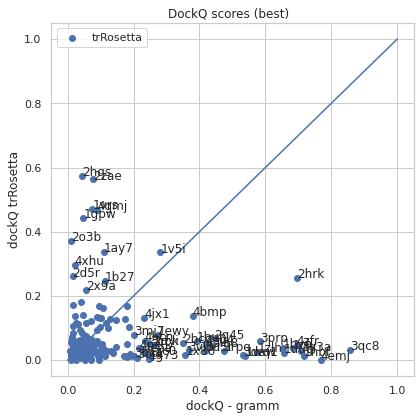

In [24]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(20.200000000000003, 0.5, 'dockQ TMdock')

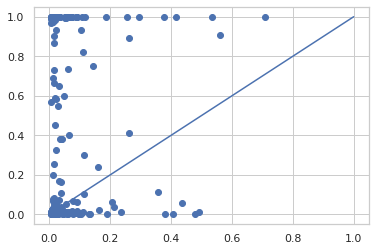

In [25]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(20.200000000000003, 0.5, 'dockQ TMdock-nohomology')

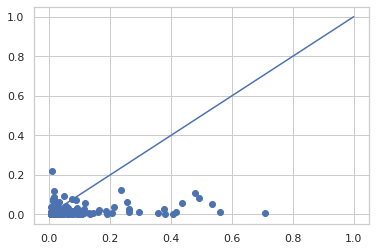

In [26]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-nohomology"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock-nohomology")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

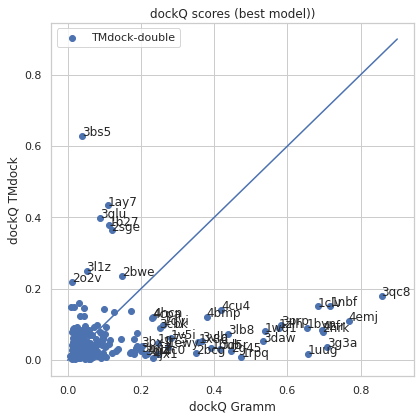

In [27]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model))" )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

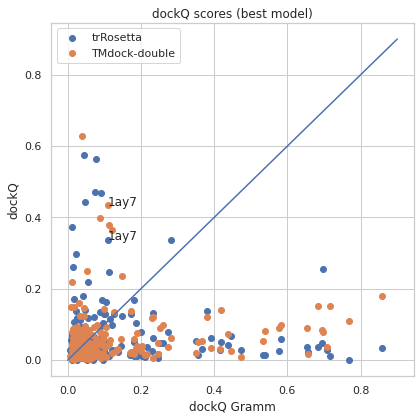

In [28]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (sstr=="3qc8" or sstr=="2hqs" or sstr=="3bs5" ):
        if (sstr=="1ay7" ):
            #if (df_merged.dockQ_y[i]> cutoff and (df_merged.dockQ_y[i]>df_merged.dockQ_x[i])):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model)") 
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [29]:
df_merged = df_max[df_max["params"].isin(["trRosetta","gramm","TMdock-double"])]
df_merged.sort_values("dockQ")

name  lenA  lenB     msa   msaA   msaB  dockQ  \
JHparams  code                                                                 
trRosetta 4emj  4emj_u2_A-4emj_u1_A   403   403  6589.0  35770  35770  0.000   
          3fap  3fap_u2_A-3fap_u1_A   108   108  1208.0  35975  35975  0.000   
          3rj3  3rj3_u2_A-3rj3_u1_A   295   295   359.0   9332   9332  0.000   
          3l1z  3l1z_u2_A-3l1z_u1_A   153   153  1390.0  48813  48813  0.000   
          1fle  1fle_u2_A-1fle_u1_A   241   241   319.0    567    567  0.001   
...                             ...   ...   ...     ...    ...    ...    ...   
gramm     2hrk  2hrk_u1_A-2hrk_u2_A   181   121     0.0     0.     0.  0.696   
          3g3a  3g3a_u1_A-3g3a_u2_A   166   130     0.0     0.     0.  0.708   
          1nbf  1nbf_u1_A-1nbf_u2_A   340    78     0.0     0.     0.  0.717   
          4emj  4emj_u1_A-4emj_u2_A   403   106     0.0     0.     0.  0.768   
          3qc8  3qc8_u1_A-3qc8_u2_A   169    82     0.0     0.     0.  0.857   

                 fnat     iRMS      LRMS  ...  CODE     params      tmAB  \
JHparams  code                            ...                              
trRosetta 4emj  0.000  687.538  1470.821  ...  4emj  trRosetta  0.886965   
          3fap  0.000  187.525   397.703  ...  3fap  trRosetta  0.839040   
          3rj3  0.000  512.189  1048.671  ...  3rj3  trRosetta  0.635370   
          3l1z  0.000  261.906   529.224  ...  3l1z  trRosetta  0.776680   
          1fle  0.000  397.029   879.077  ...  1fle  trRosetta  0.674835   
...               ...      ...       ...  ...   ...        ...       ...   
gramm     2hrk  0.978   13.721    37.969  ...  2hrk      gramm  1.000000   
          3g3a  0.787   11.568    27.296  ...  3g3a      gramm  1.000000   
          1nbf  0.649   20.191    45.946  ...  1nbf      gramm  1.000000   
          4emj  0.762    3.742    10.650  ...  4emj      gramm  1.000000   
          3qc8  0.977   11.047    18.799  ...  3qc8      gramm  1.000000   

                msaAB  tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect  \
JHparams  code                                                                
trRosetta 4emj    NaN   0.90839      35770   0.86941     354953         0.0   
          3fap    NaN   0.87845      35975   0.80043       1487         0.0   
          3rj3    NaN   0.80210       9332   0.48427      54903         0.0   
          3l1z    NaN   0.83424      48813   0.72778      37715         0.0   
          1fle    NaN   0.89615        567   0.45998      45351         0.0   
...               ...       ...        ...       ...        ...         ...   
gramm     2hrk    NaN   1.00000         0.   1.00000         0.         0.0   
          3g3a    NaN   1.00000         0.   1.00000         0.         0.0   
          1nbf    NaN   1.00000         0.   1.00000         0.         0.0   
          4emj    NaN   1.00000         0.   1.00000         0.         0.0   
          3qc8    NaN   1.00000         0.   1.00000         0.         0.0   

                len  
JHparams  code       
trRosetta 4emj  509  
          3fap  201  
          3rj3  421  
          3l1z  239  
          1fle  299  
...             ...  
gramm     2hrk  302  
          3g3a  296  
          1nbf  418  
          4emj  509  
          3qc8  251  

[652 rows x 40 columns]

In [30]:
len(df_merged.loc[df_merged.dockQ>0.2]["CODE"].unique())

53

In [31]:
len(df_merged.loc[(df_merged.params=="trRosetta")&(df_merged.dockQ>0.2 )]["CODE"].unique())

13

In [32]:
len(df_merged.loc[(df_merged.params=="gramm")&(df_merged.dockQ>0.2 )]["CODE"].unique())

36

In [33]:
len(df_merged.loc[(df_merged.params=="TMdock-double")&(df_merged.dockQ>0.2 )]["CODE"].unique())

8

In [34]:
len(df_merged["CODE"].unique())

218

In [35]:
df.loc[df.params=="TMdock-double"].sort_values("dockQ")

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
9924,1y64_u1_A-1y64_u2_A,TMdock-double,412,361,0.0,0.,0.,0.000,0.000,135.286,...,1y64,TMdock-double,1.0,NaN,1.0,0.,1.0,0.,0.000,773
10623,3hzi_u1_A-3hzi_u2_A,TMdock-double,410,70,0.0,0.,0.,0.000,0.000,140.378,...,3hzi,TMdock-double,1.0,NaN,1.0,0.,1.0,0.,0.000,480
10625,3hzi_u1_A-3hzi_u2_A,TMdock-double,410,70,0.0,0.,0.,0.000,0.000,125.318,...,3hzi,TMdock-double,1.0,NaN,1.0,0.,1.0,0.,0.000,480
9681,1jk9_u1_A-1jk9_u2_A,TMdock-double,218,154,0.0,0.,0.,0.000,0.000,180.465,...,1jk9,TMdock-double,1.0,NaN,1.0,0.,1.0,0.,172.806,372
9679,1jk9_u1_A-1jk9_u2_A,TMdock-double,218,154,0.0,0.,0.,0.000,0.000,199.118,...,1jk9,TMdock-double,1.0,NaN,1.0,0.,1.0,0.,172.806,372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,3qlu_u1_A-3qlu_u2_A,TMdock-double,384,374,0.0,0.,0.,0.398,0.542,3.667,...,3qlu,TMdock-double,1.0,NaN,1.0,0.,1.0,0.,404.022,758
9434,1ay7_u1_A-1ay7_u2_A,TMdock-double,97,90,0.0,0.,0.,0.434,0.417,2.576,...,1ay7,TMdock-double,1.0,NaN,1.0,0.,1.0,0.,53.985,187
10476,3bs5_u1_A-3bs5_u2_A,TMdock-double,84,76,0.0,0.,0.,0.539,0.900,2.876,...,3bs5,TMdock-double,1.0,NaN,1.0,0.,1.0,0.,34.196,160
10472,3bs5_u1_A-3bs5_u2_A,TMdock-double,84,76,0.0,0.,0.,0.560,0.700,2.688,...,3bs5,TMdock-double,1.0,NaN,1.0,0.,1.0,0.,34.196,160


In [36]:
df_merged.groupby(["CODE"]).median().sort_values("dockQ")


,lenA,lenB,msa,dockQ,fnat,iRMS,LRMS,fnonnat,mm,tmA,...,auc,evalue,seqid,rank,tmAB,msaAB,tmAB_max,tmAB_min,numcorrect,len
CODE,,,,,,,,,,,,,,,,,,,,,
1ycs,197.0,195.0,0.0,0.0090,0.000,64.5590,155.5760,1.0000,0.502560,1.00000,...,0.000,134.00,66.667,10.0,0.669755,NaN,1.00000,0.635710,0.000,392.0
3rj3,295.0,126.0,0.0,0.0090,0.000,56.4120,155.5220,1.0000,0.701670,1.00000,...,0.000,9999.00,0.000,10.0,1.000000,NaN,1.00000,1.000000,0.000,421.0
2xwb,711.0,229.0,0.0,0.0100,0.000,59.4180,107.4400,1.0000,0.756930,1.00000,...,0.000,352.00,66.667,10.0,1.000000,NaN,1.00000,1.000000,0.000,940.0
2v55,388.0,180.0,0.0,0.0110,0.000,65.6380,133.8250,1.0000,0.683750,1.00000,...,0.000,69.00,66.667,10.0,1.000000,NaN,1.00000,1.000000,0.000,568.0
1te1,275.0,191.0,0.0,0.0110,0.000,96.5570,218.1660,1.0000,0.590520,1.00000,...,0.000,220.00,100.000,10.0,1.000000,NaN,1.00000,1.000000,0.000,466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1b27,109.0,90.0,0.0,0.2470,0.160,32.7470,74.6080,1.0000,0.786140,1.00000,...,0.460,4.30,50.000,10.0,1.000000,NaN,1.00000,1.000000,49.025,199.0
2hrk,181.0,121.0,0.0,0.2570,0.326,26.7580,75.1980,1.0000,0.600000,1.00000,...,0.000,0.36,19.718,10.0,1.000000,NaN,1.00000,1.000000,0.000,302.0
1vrs,124.0,120.5,1045.5,0.2735,0.306,119.8405,249.2075,0.9905,0.694125,0.99644,...,0.245,3.00,38.462,6.0,0.817912,NaN,0.99644,0.639385,26.994,241.0


Text(0, 0.5, 'dockQ TMdock')

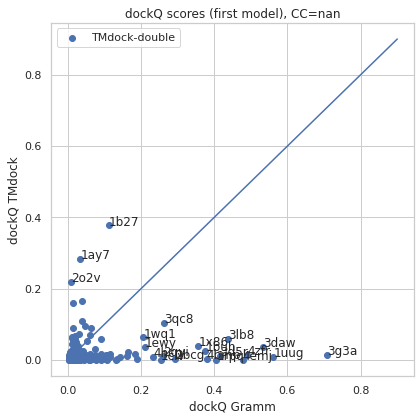

In [37]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock TMdock-double')

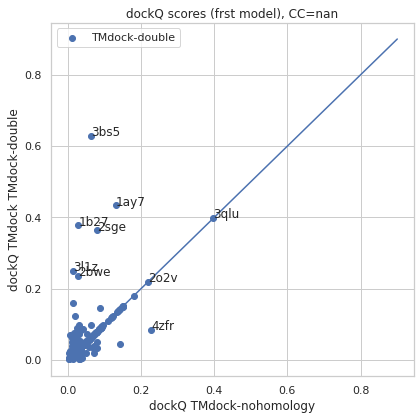

In [38]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-nohomology"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock-nohomology")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock trRosetta')

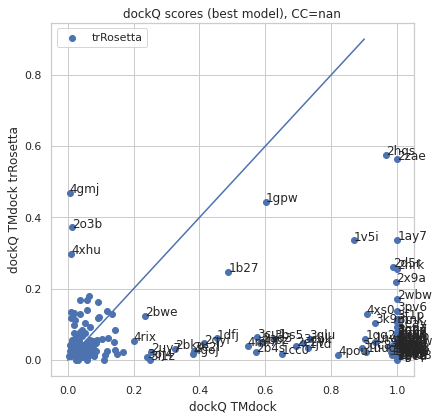

In [39]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  pdbsurface')

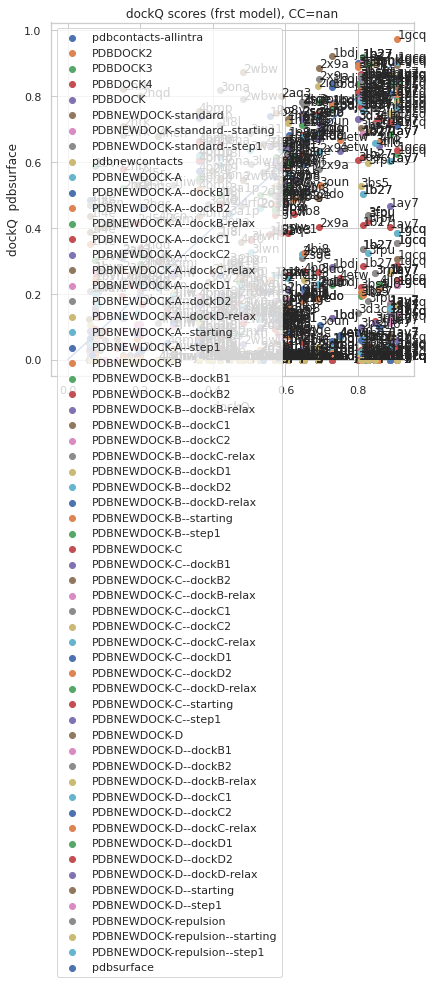

In [40]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDB|^pdb")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-repulsion--step1')

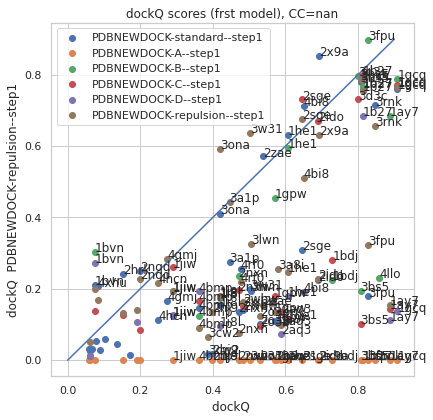

In [41]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*step1.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D')

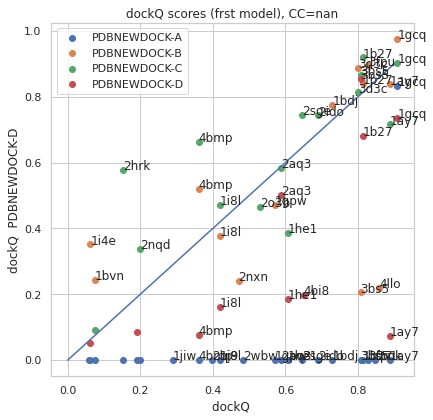

In [42]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-[ABCD]$")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockB-relax')

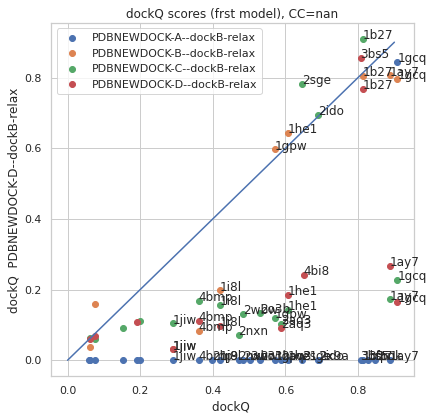

In [43]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockB-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockC-relax')

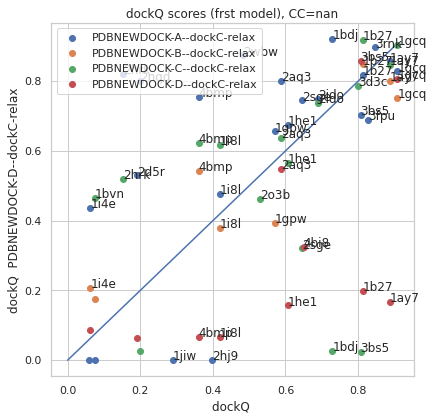

In [44]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockC-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockD-relax')

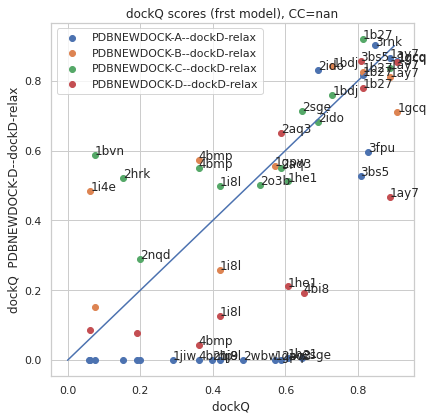

In [45]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockD-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-C')

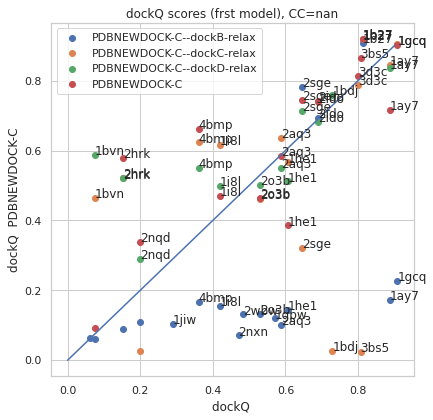

In [46]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-C--dockD-relax')

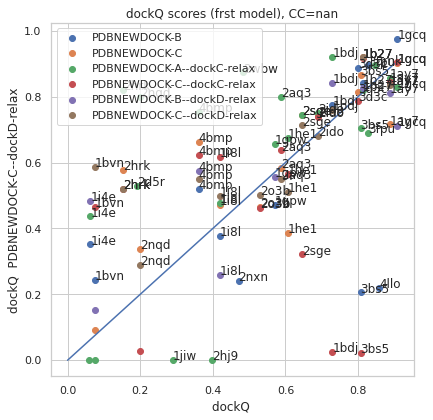

In [47]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]
pdbset=["PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [48]:
r=re.compile(".*relax.*")
#pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts"]
pdbset=sorted(["PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax","pdbcontacts"])


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A--dockC-relax")&(df_max.params.isin(pdbset) )]["CODE"].unique()
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-B--dockD-relax")&(df_max.params.isin(pdbset) )]["CODE"].unique()


In [49]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()

PDBNEWDOCK-A--dockC-relax
PDBNEWDOCK-B
PDBNEWDOCK-B--dockD-relax
PDBNEWDOCK-C
PDBNEWDOCK-C--dockC-relax
PDBNEWDOCK-C--dockD-relax
pdbcontacts


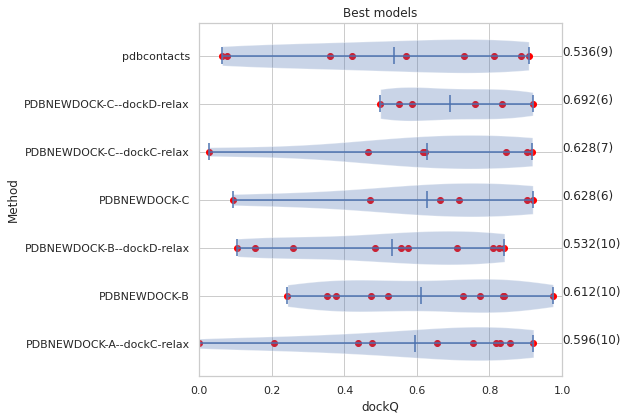

In [50]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [51]:
for d in pdbset:
    print (d,len(df_max.loc[(df_max.params==d)]["CODE"].unique()))

PDBNEWDOCK-A--dockC-relax 30
PDBNEWDOCK-B 26
PDBNEWDOCK-B--dockD-relax 10
PDBNEWDOCK-C 18
PDBNEWDOCK-C--dockC-relax 19
PDBNEWDOCK-C--dockD-relax 13
pdbcontacts 57


In [52]:
all_df

,JHparams,code,name,lenA,lenB,msa,msaA,msaB,dockQ,fnat,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,PDBNEWDOCK-A--dockC-relax,1ay7,1ay7_u1_A-1ay7_u2_A.pdb-dockC-relax,97,90,1060.0,0.,0.,0.857,0.806,...,1ay7,PDBNEWDOCK-A--dockC-relax,0.985960,NaN,0.98828,0.,0.98364,0.,0.0,187
1,PDBNEWDOCK-A--dockC-relax,1b27,1b27_u1_A-1b27_u2_A.pdb-dockC-relax,109,90,733.0,0.,0.,0.819,0.760,...,1b27,PDBNEWDOCK-A--dockC-relax,0.977945,NaN,0.98631,0.,0.96958,0.,0.0,199
2,PDBNEWDOCK-A--dockC-relax,1bdj,1bdj_u1_A-1bdj_u2_A.pdb-dockC-relax,129,118,5651.0,0.,0.,0.921,0.882,...,1bdj,PDBNEWDOCK-A--dockC-relax,0.991980,NaN,0.99475,0.,0.98921,0.,0.0,247
3,PDBNEWDOCK-A--dockC-relax,1bvn,1bvn_u1_A-1bvn_u2_A.pdb-dockC-relax,496,75,95.0,0.,0.,0.000,0.000,...,1bvn,PDBNEWDOCK-A--dockC-relax,0.893200,NaN,0.89804,0.,0.88836,0.,0.0,571
4,PDBNEWDOCK-A--dockC-relax,1cc0,1cc0_u1_A-1cc0_u2_A.pdb-dockC-relax,178,149,1151.0,0.,0.,0.205,0.550,...,1cc0,PDBNEWDOCK-A--dockC-relax,0.908955,NaN,0.97750,0.,0.84041,0.,0.0,327
5,PDBNEWDOCK-A--dockC-relax,1gcq,1gcq_u1_A-1gcq_u2_A.pdb-dockC-relax,66,57,1365.0,0.,0.,0.828,0.760,...,1gcq,PDBNEWDOCK-A--dockC-relax,0.972830,NaN,0.97368,0.,0.97198,0.,0.0,123
6,PDBNEWDOCK-A--dockC-relax,1gpw,1gpw_u1_A-1gpw_u2_A.pdb-dockC-relax,252,204,7137.0,0.,0.,0.656,0.667,...,1gpw,PDBNEWDOCK-A--dockC-relax,0.931080,NaN,0.93904,0.,0.92312,0.,0.0,456
7,PDBNEWDOCK-A--dockC-relax,1i4e,1i4e_u1_A-1i4e_u2_A.pdb-dockC-relax,296,241,1.0,0.,0.,0.437,0.556,...,1i4e,PDBNEWDOCK-A--dockC-relax,0.938085,NaN,0.94040,0.,0.93577,0.,0.0,537
8,PDBNEWDOCK-A--dockC-relax,1i8l,1i8l_u1_A-1i8l_u2_A.pdb-dockC-relax,201,130,38.0,0.,0.,0.477,0.680,...,1i8l,PDBNEWDOCK-A--dockC-relax,0.754365,NaN,0.94009,0.,0.56864,0.,0.0,331
9,PDBNEWDOCK-A--dockC-relax,4bmp,4bmp_u1_A-4bmp_u2_A.pdb-dockC-relax,301,118,4607.0,0.,0.,0.755,0.691,...,4bmp,PDBNEWDOCK-A--dockC-relax,0.979935,NaN,0.98034,0.,0.97953,0.,0.0,419


In [53]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()


In [54]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2',

In [55]:
r=re.compile(".*relax.*")
pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts"]


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A")&(df_max.params.isin(pdbset) )]["CODE"].unique()


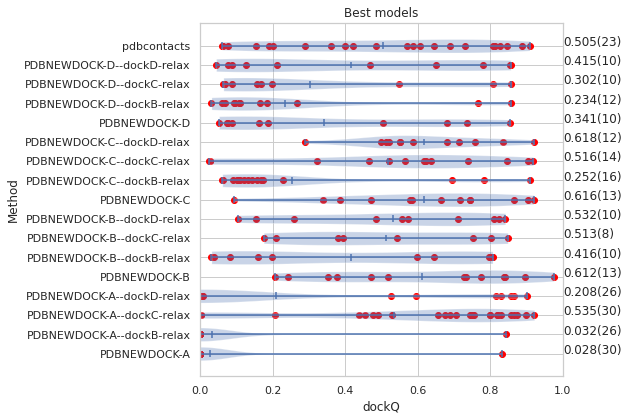

In [56]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [57]:
codes

array(['1ay7', '1b27', '1bdj', '1bvn', '1cc0', '1gcq', '1gpw', '1he1',
       '1i4e', '1i8l', '1jiw', '1k5g', '1nql', '1rpq', '1vg0', '1wrd',
       '2aq3', '2b4s', '2d5r', '2grx', '2hj9', '2hrk', '2ido', '2nqd',
       '2sge', '2wbw', '3bs5', '3fpu', '3rnk', '4bmp'], dtype=object)

In [58]:
all_df

,JHparams,code,name,lenA,lenB,msa,msaA,msaB,dockQ,fnat,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,PDBNEWDOCK-A,1ay7,1ay7_u1_A-1ay7_u2_A,97,90,1060.0,0.,0.,0.000,0.000,...,1ay7,PDBNEWDOCK-A,0.986970,NaN,0.98712,0.,0.98682,0.,0.0,187
1,PDBNEWDOCK-A,1b27,1b27_u1_A-1b27_u2_A,109,90,733.0,0.,0.,0.000,0.000,...,1b27,PDBNEWDOCK-A,0.980545,NaN,0.98602,0.,0.97507,0.,0.0,199
2,PDBNEWDOCK-A,1bdj,1bdj_u1_A-1bdj_u2_A,129,118,5651.0,0.,0.,0.000,0.000,...,1bdj,PDBNEWDOCK-A,0.991110,NaN,0.99125,0.,0.99097,0.,0.0,247
3,PDBNEWDOCK-A,1bvn,1bvn_u1_A-1bvn_u2_A,496,75,95.0,0.,0.,0.000,0.000,...,1bvn,PDBNEWDOCK-A,0.882520,NaN,0.88313,0.,0.88191,0.,0.0,571
4,PDBNEWDOCK-A,1cc0,1cc0_u1_A-1cc0_u2_A,178,149,1151.0,0.,0.,0.000,0.000,...,1cc0,PDBNEWDOCK-A,0.905920,NaN,0.97365,0.,0.83819,0.,0.0,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,pdbcontacts,2wbw,2wbw_u1_A-2wbw_u2_A,186,125,6.0,0.,0.,0.484,0.725,...,2wbw,pdbcontacts,0.843490,NaN,0.94526,0.,0.74172,0.,0.0,311
269,pdbcontacts,3bs5,3bs5_u1_A-3bs5_u2_A,84,76,1392.0,0.,0.,0.807,0.733,...,3bs5,pdbcontacts,0.969510,NaN,0.99430,0.,0.94472,0.,0.0,160
270,pdbcontacts,3fpu,3fpu_u1_A-3fpu_u2_A,89,70,1.0,0.,0.,0.827,0.853,...,3fpu,pdbcontacts,0.963525,NaN,0.97481,0.,0.95224,0.,0.0,159
271,pdbcontacts,3rnk,3rnk_u1_A-3rnk_u2_A,113,105,485.0,0.,0.,0.847,0.718,...,3rnk,pdbcontacts,0.987130,NaN,0.98918,0.,0.98508,0.,0.0,218


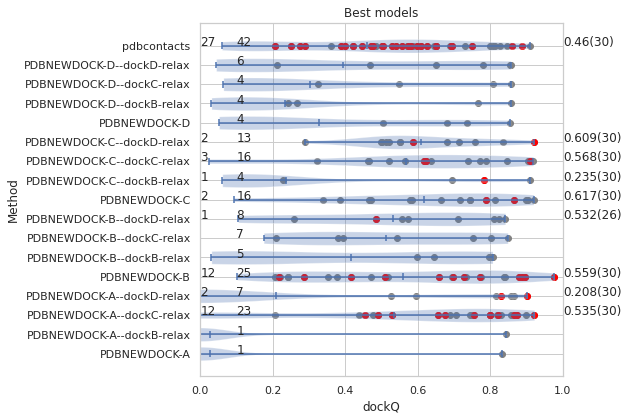

In [59]:
# FInd best method for each model.
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"
                    ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


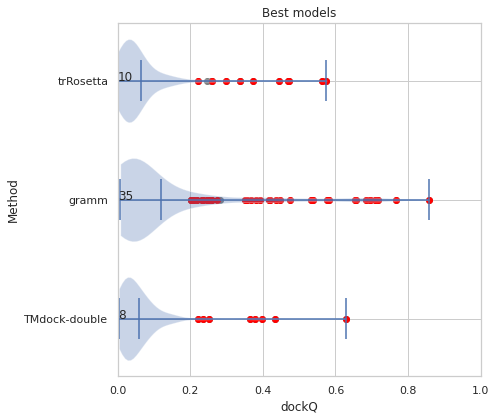

In [60]:
compareset=["trRosetta","gramm","TMdock-double"]
codes=df_max.loc[df_max.params.isin(compareset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(compareset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(compareset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(compareset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        #ax.annotate(str(round(average[best_df.JHparams[i]],3))+
        #            "("+str(length[good_df.JHparams[i]])+")"
        #            ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


In [61]:
best_df

,index,JHparams,code,name,lenA,lenB,msa,msaA,msaB,dockQ,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,585,gramm,3qc8,3qc8_u1_A-3qc8_u2_A,169,82,0.0,0.,0.,0.857,...,3qc8,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,251
1,590,gramm,4emj,4emj_u1_A-4emj_u2_A,403,106,0.0,0.,0.,0.768,...,4emj,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,509
2,565,gramm,1nbf,1nbf_u1_A-1nbf_u2_A,340,78,0.0,0.,0.,0.717,...,1nbf,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,418
3,580,gramm,3g3a,3g3a_u1_A-3g3a_u2_A,166,130,0.0,0.,0.,0.708,...,3g3a,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,296
4,574,gramm,2hrk,2hrk_u1_A-2hrk_u2_A,181,121,0.0,0.,0.,0.696,...,2hrk,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,302
5,594,gramm,4zfr,4zfr_u1_A-4zfr_u2_A,186,77,0.0,0.,0.,0.695,...,4zfr,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,263
6,562,gramm,1clv,1clv_u1_A-1clv_u2_A,471,33,0.0,0.,0.,0.684,...,1clv,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,504
7,567,gramm,1uug,1uug_u1_A-1uug_u2_A,230,83,0.0,0.,0.,0.656,...,1uug,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,313
8,560,gramm,1bvn,1bvn_u1_A-1bvn_u2_A,496,75,0.0,0.,0.,0.653,...,1bvn,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,571
9,543,TMdock-double,3bs5,3bs5_u1_A-3bs5_u2_A,84,76,0.0,0.,0.,0.628,...,3bs5,TMdock-double,1.000000,NaN,1.00000,0.,1.00000,0.,34.196,160


In [62]:
codes

array(['1ay7', '1b27', '1bdj', '1buh', '1bvn', '1cc0', '1clv', '1dfj',
       '1eay', '1eer', '1ewy', '1fle', '1fq1', '1g6v', '1g73', '1gcq',
       '1gg2', '1gpw', '1he1', '1i2m', '1i4e', '1i8l', '1ib1', '1jiw',
       '1jk9', '1jtd', '1k5g', '1kgy', '1lb2', '1lfd', '1mq8', '1nbf',
       '1nql', '1nw9', '1oc0', '1pvh', '1qav', '1r8s', '1rpq', '1s1q',
       '1te1', '1tmq', '1uug', '1v5i', '1vg0', '1wq1', '1wrd', '1x86',
       '1xt9', '1y64', '1y8x', '1ycs', '1yu6', '1yvb', '1z5y', '1zlh',
       '2a41', '2a5d', '2a9k', '2abz', '2aq3', '2b4s', '2bcg', '2bcn',
       '2bku', '2bwe', '2c0l', '2c2v', '2ch4', '2d5r', '2ejf', '2g45',
       '2grx', '2gwf', '2hj9', '2hqs', '2hrk', '2i25', '2ido', '2iwt',
       '2nqd', '2nxn', '2o25', '2o2v', '2o3b', '2o8v', '2oob', '2qyi',
       '2sge', '2uy7', '2v55', '2vdb', '2vrr', '2wbw', '2wy7', '2wy8',
       '2x9a', '2xgy', '2xwb', '2zae', '3a1p', '3a8i', '3av0', '3bh6',
       '3bs5', '3buz', '3bx1', '3cbk', '3cu1', '3cw2', '3d3c', '3d5r',
      

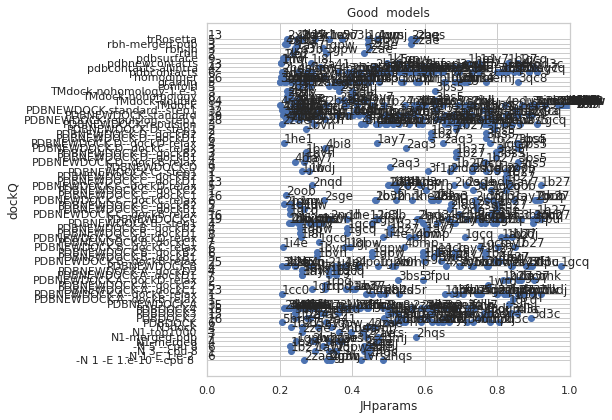

In [63]:

f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
ax.set_title("Good  models")
ax.set_xlabel("JHparams")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

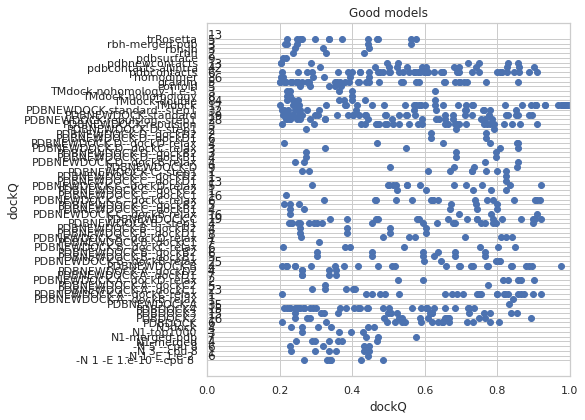

In [64]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

In [65]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2',

In [66]:
# here we find what method is best for each target

r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print(excludecolumns)
excludecolumns+=["confold","rbh-merged-pdb"]
tempdf=newdf.loc[~newdf.JHparams.isin(excludecolumns)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

['gramm', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C-

,index,JHparams,code,name,lenA,lenB,msa,msaA,msaB,dockQ,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
5,9,-N 3 --cpu 8,1gpw,1gpw_u2_A-1gpw_u1_A,252,252,7137.0,67629,67629,0.354,...,1gpw,-N 3 --cpu 8,0.888935,NaN,0.89468,67629,0.88319,58466,130.000,456
6,10,-N 3 --cpu 8,1v5i,1v5i_u2_A-1v5i_u1_A,276,276,1922.0,54177,54177,0.336,...,1v5i,-N 3 --cpu 8,0.826270,NaN,0.89294,54177,0.75960,12066,1.000,354
10,8,-N 3 --cpu 8,1b27,1b27_u2_A-1b27_u1_A,109,109,733.0,2034,2034,0.231,...,1b27,-N 3 --cpu 8,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
7,13,-N 5 --cpu 8,1ay7,1ay7_u2_A-1ay7_u1_A,97,97,1060.0,2034,2034,0.319,...,1ay7,-N 5 --cpu 8,0.830380,NaN,0.84095,2034,0.81981,1485,53.985,187
2,22,N1-merged,4gmj,4gmj_u2_A-4gmj_u1_A,253,253,1189.0,0.,0.,0.469,...,4gmj,N1-merged,0.803190,NaN,0.82588,0.,0.78050,0.,137.151,489
4,20,N1-merged,2o3b,2o3b_u2_A-2o3b_u1_A,240,240,456.0,0.,0.,0.372,...,2o3b,N1-merged,0.727490,NaN,0.83406,0.,0.62495,0.,29.008,384
8,23,N1-merged,4xhu,4xhu_u2_A-4xhu_u1_A,352,352,410.0,0.,0.,0.298,...,4xhu,N1-merged,0.829155,NaN,0.84232,0.,0.81599,0.,19.910,447
0,25,N1-merged-pdb,2hqs,2hqs_u2_A-2hqs_u1_A,398,398,2368.0,0.,0.,0.575,...,2hqs,N1-merged-pdb,0.969605,NaN,0.97016,0.,0.96905,0.,100.035,507
1,24,N1-merged-pdb,1vrs,1vrs_u2_A-1vrs_u1_A,124,124,836.0,0.,0.,0.472,...,1vrs,N1-merged-pdb,0.989810,NaN,0.99288,0.,0.98674,0.,53.988,241
3,35,N3dock,2zae,2zae_u2_A-2zae_u1_A,107,107,1125.0,1659,1659,0.461,...,2zae,N3dock,0.792020,NaN,0.79343,1659,0.79061,1521,103.041,200


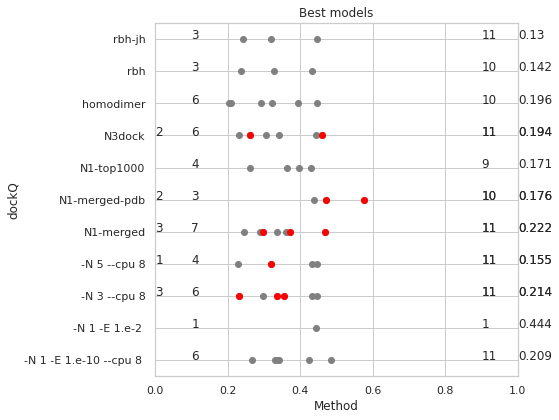

In [67]:
# FInd best method for each model.
codes=best_df["code"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
good_df=newdf.loc[(newdf.code.isin(codes))&(~newdf.JHparams.isin(excludecolumns))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_xlabel("Method")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
for d in datasets:
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3)),(1.0, best_df.JHparams[i]))
        ax.annotate(str(length[best_df.JHparams[i]]),(.9, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        ax.annotate(str(length[good_df.JHparams[i]]),(.9, good_df.JHparams[i]))


In [68]:
df.sort_values('dockQ', ascending=False).drop_duplicates(["code"])

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
15063,3mj7_u1_A-3mj7_u2_A,TMdock,228,187,0.0,0.,0.,1.000,1.0,0.000,...,3mj7,TMdock,1.000000,NaN,1.00000,0.,1.00000,0.,23.085,415
14123,1pvh_u1_A-1pvh_u2_A,TMdock,209,160,0.0,0.,0.,1.000,1.0,0.000,...,1pvh,TMdock,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,369
14323,1zlh_u1_A-1zlh_u2_A,TMdock,306,76,0.0,0.,0.,1.000,1.0,0.000,...,1zlh,TMdock,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,382
13913,1g73_u1_A-1g73_u2_A,TMdock,174,97,0.0,0.,0.,1.000,1.0,0.016,...,1g73,TMdock,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,271
14533,2hrk_u1_A-2hrk_u2_A,TMdock,181,121,0.0,0.,0.,1.000,1.0,0.011,...,2hrk,TMdock,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,4rws_u1_A-4rws_u2_A,gramm,434,72,0.0,0.,0.,0.021,0.0,13.357,...,4rws,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,506
2878,4v2c_u1_A-4v2c_u2_A,gramm,324,107,0.0,0.,0.,0.019,0.0,14.698,...,4v2c,gramm,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,431
3128,2o25_u2_A-2o25_u1_A,homodimer,160,202,1373.0,37698,37736,0.016,0.0,21.217,...,2o25,homodimer,0.703365,NaN,0.72206,37736,0.68467,37698,0.000,362
7652,1te1_u1_A-1te1_u2_A,TMdock-nohomology-1.e-5,275,191,0.0,0.,0.,0.016,0.0,16.409,...,1te1,TMdock-nohomology-1.e-5,1.000000,NaN,1.00000,0.,1.00000,0.,0.000,466


In [69]:
df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].groupby("name").max()


,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,LRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
name,,,,,,,,,,,,,,,,,,,,,
1ay7_u1_A-1ay7_u2_A,rbh-jh,97,90,1060.0,1485,2034,0.319,0.306,4.002,9.104,...,1ay7,rbh-jh,0.830380,NaN,0.84625,2034,0.81981,1485,53.985,187
1ay7_u2_A-1ay7_u1_A,homodimer,90,97,1060.0,2034,1485,0.260,0.306,4.395,11.298,...,1ay7,homodimer,0.817620,NaN,0.84181,2034,0.79459,1485,43.992,187
1b27_u1_A-1b27_u2_A,homodimer,109,90,733.0,1484,2034,0.230,0.160,4.787,10.176,...,1b27,homodimer,0.825820,NaN,0.85658,2034,0.79542,1484,49.025,199
1b27_u2_A-1b27_u1_A,homodimer,90,109,733.0,2034,1484,0.231,0.160,5.319,9.542,...,1b27,homodimer,0.810645,NaN,0.83444,2034,0.78801,1484,46.020,199
1gpw_u1_A-1gpw_u2_A,rbh-jh,252,204,7137.0,58466,7554,0.351,0.320,4.776,11.778,...,1gpw,rbh-jh,0.889680,NaN,0.89229,7554,0.88822,58466,179.000,456
1gpw_u2_A-1gpw_u1_A,rbh-jh,204,252,7137.0,7554,58466,0.354,0.333,5.865,9.606,...,1gpw,rbh-jh,0.894335,NaN,0.89745,7554,0.89220,58466,163.000,456
1v5i_u1_A-1v5i_u2_A,-N 3 --cpu 8,276,78,1922.0,54177,12066,0.336,0.191,3.748,5.851,...,1v5i,-N 3 --cpu 8,0.818890,NaN,0.88557,54177,0.75221,12066,1.000,354
1vrs_u1_A-1vrs_u2_A,N1-top1000,124,117,836.0,1396,1245,0.472,0.449,2.953,9.785,...,1vrs,N1-top1000,0.989810,NaN,0.99288,1396,0.98674,1245,53.988,241
1vrs_u2_A-1vrs_u1_A,N1-top1000,117,124,2091.0,1245,1396,0.295,0.286,7.831,11.866,...,1vrs,N1-top1000,0.897465,NaN,0.98730,1396,0.81427,1245,40.015,241


['gramm', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C-

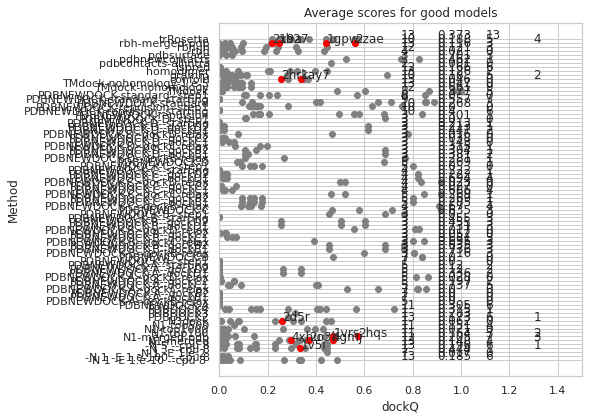

In [70]:
r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print (excludecolumns)
includeTR=["pdbcontacts","PDBDOCK","TMdock-double"]
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best methods")

new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].sort_values('dockQ', ascending=False).drop_duplicates(["code"]).reset_index()
codes=new_df.CODE.unique()
#print(new_df)
#newdf.sort_values(["JHparams","dockQ","code"],inplace=True)

tempdf=df_max.loc[(df_max.CODE.isin(codes)) & (~df_max.params.isin(includeTR))].reset_index()
plt.scatter(tempdf.dockQ,tempdf.params,color="grey")
#print(tempdf[tempdf.params=="N1-top1000"])
plt.scatter(new_df.dockQ,new_df.params,color="red")
#print(new_df[new_df.params=="N1-top1000"])

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Average scores for good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("Method")
ax.set(xlim=[0,1])
done={}
average={}
length={}
ax.set(xlim=[0,1.5])
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
    average[d]=df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"])
for i, txt in enumerate(tempdf.name):
    #print (i,txt, newdf.JHparams[i])
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(tempdf.loc[(tempdf.params==tempdf.params[i])&(tempdf.dockQ>cutoff)])
    
    #print (numhit,newdf.JHparams[i])
    if done[tempdf.params[i]]==0:
        done[tempdf.params[i]]=1
        ax.annotate(str(numhit),(1.1, tempdf.params[i]))
        #ax.annotate("0",(.1, tempdf.JHparams[i]))  
        ax.annotate(str(round(average[tempdf.params[i]],3)),(.9, tempdf.params[i]))          
        ax.annotate(str(round(length[tempdf.params[i]],3)),(.75, tempdf.params[i]))  
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
for i, txt in enumerate(new_df.name):
    #print (i,txt,newdf.dockQ[i], newdf.JHparams[i])
    sstr=txt[0:4]
    ax.annotate(sstr, (new_df.dockQ[i], new_df.params[i]))
    numhit=len(new_df.loc[new_df.params==new_df.params[i]])
    #numhit2=len(tempdf.loc[tempdf.JHparams==tempdf.params[i]])
    #print (numhit,newdf.JHparams[i])
    if done[new_df.params[i]]==0:
        done[new_df.params[i]]=1
        ax.annotate(str(numhit),(1.3, new_df.params[i]))  
        #ax.annotate(str(numhit2),(-0.1, new_df.JHparams[i]))


<ipython-input-73-8a99da28f7c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first["size"]=pd.qcut(df_first['msa'], q=4)
<ipython-input-73-8a99da28f7c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first["l"]=pd.qcut(df_first['lenA'], q=1)


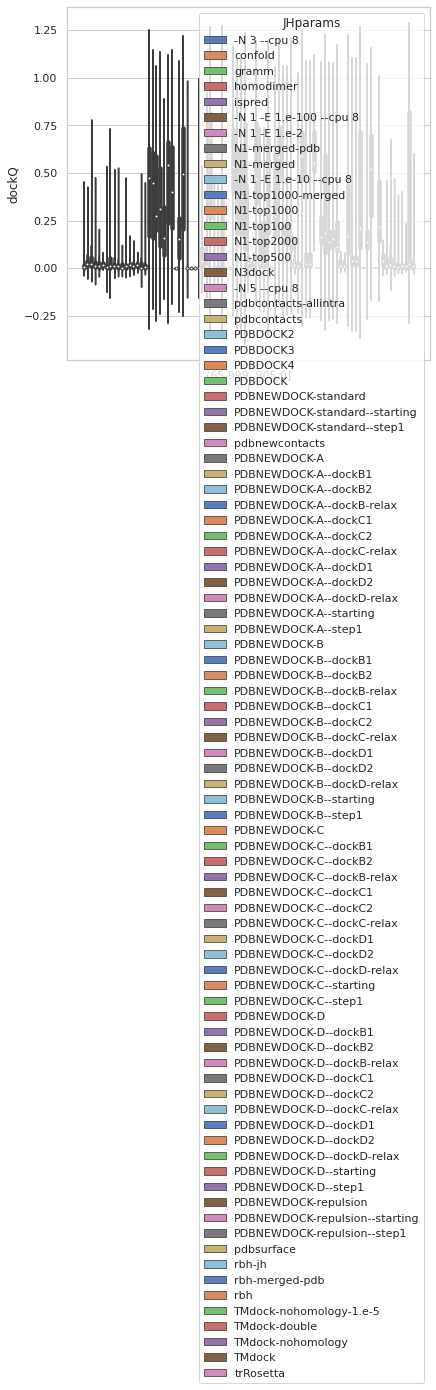

In [73]:
df_first["size"]=pd.qcut(df_first['msa'], q=4)
df_first["l"]=pd.qcut(df_first['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="dockQ", hue="JHparams",
                    data=df_first, palette="muted")

In [74]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="iRMS", hue="JHparams",
                    data=df_first, palette="muted")

ValueError: Bin edges must be unique: array([   0.,    0.,    0.,  205., 8142.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [75]:
data_first[datasets[0]]

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.298,0.222,3.561,...,1ay7,-N 3 --cpu 8,0.828190,NaN,0.84625,2034,0.81013,1485,53.985,187
2,1b27_u1_A-1b27_u2_A,-N 3 --cpu 8,109,90,733.0,1484,2034,0.223,0.120,4.508,...,1b27,-N 3 --cpu 8,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
4,1bdj_u1_A-1bdj_u2_A,-N 3 --cpu 8,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,1bdj,-N 3 --cpu 8,0.861435,NaN,0.92240,349880,0.80047,23051,0.000,247
6,1buh_u1_A-1buh_u2_A,-N 3 --cpu 8,291,72,1177.0,555226,1820,0.000,0.000,523.917,...,1buh,-N 3 --cpu 8,0.560760,NaN,0.73259,555226,0.38893,1820,0.000,363
8,1bvn_u1_A-1bvn_u2_A,-N 3 --cpu 8,496,75,95.0,52623,123,0.006,0.000,27.357,...,1bvn,-N 3 --cpu 8,0.619740,NaN,0.70905,52623,0.53043,123,0.000,571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,4zfr_u1_A-4zfr_u2_A,-N 3 --cpu 8,186,77,1358.0,9290,38386,0.000,0.000,291.376,...,4zfr,-N 3 --cpu 8,0.796765,NaN,0.83034,9290,0.76319,38386,0.000,263
428,5brr_u1_A-5brr_u2_A,-N 3 --cpu 8,378,266,611.0,13553,45450,0.012,0.000,21.167,...,5brr,-N 3 --cpu 8,0.794655,NaN,0.81110,45450,0.77821,13553,2.000,644
430,5cec_u1_A-5cec_u2_A,-N 3 --cpu 8,403,191,1594.0,30621,309307,0.000,0.000,732.223,...,5cec,-N 3 --cpu 8,0.768860,NaN,0.84687,309307,0.69085,30621,0.000,594
432,5cra_u1_A-5cra_u2_A,-N 3 --cpu 8,193,77,1.0,11,38383,0.008,0.000,22.323,...,5cra,-N 3 --cpu 8,0.546110,NaN,0.71106,38383,0.38116,11,0.000,270


# TEST to do
# First ranked..
# U1 vs U2

/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


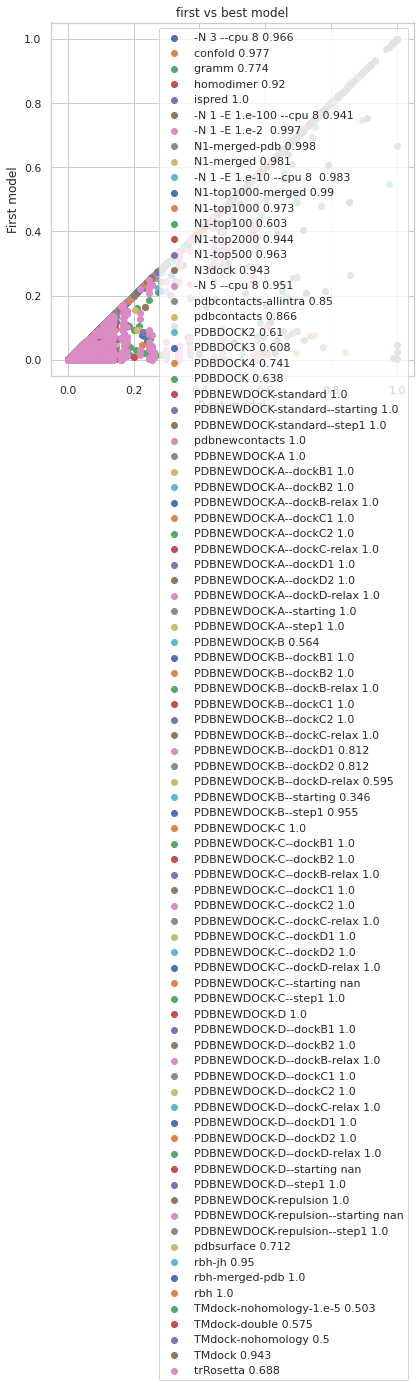

In [76]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    df_merged = pd.merge(data_max[d],data_first[d], on=['code'],how="inner")
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d+" "+str(round(cc[0,1],3)))
ax.set_title("first vs best model")
ax.set_xlabel("Best model")
ax.set_ylabel("First model")
ax.legend()



In [77]:
datasets


array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2',

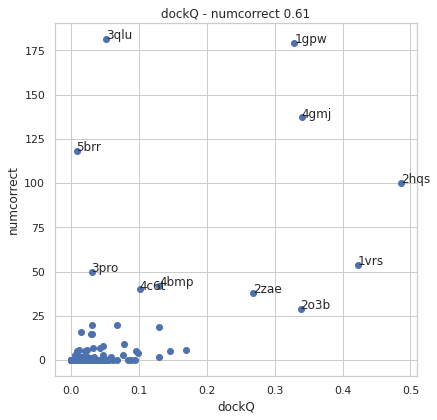

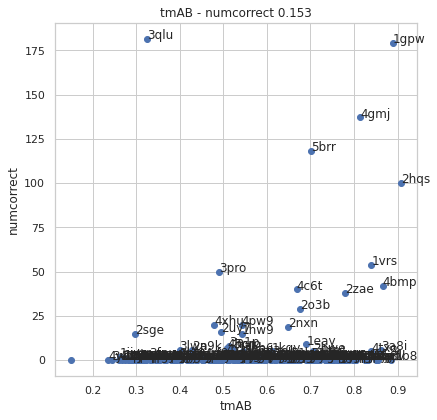

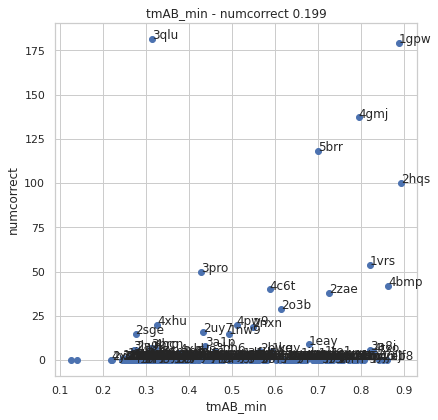

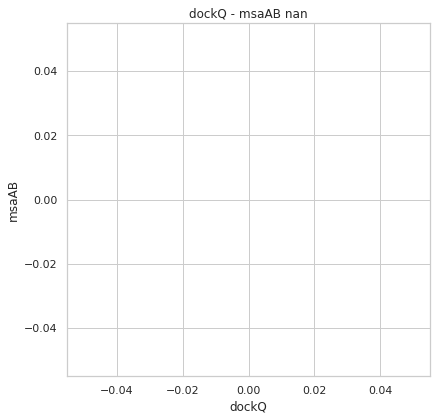

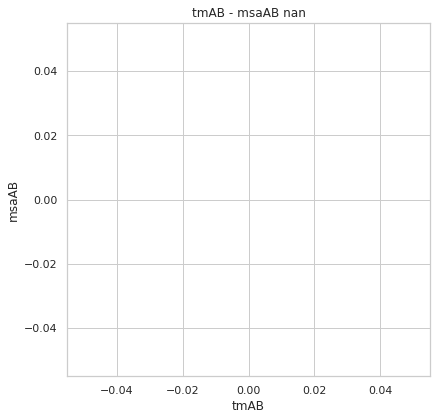

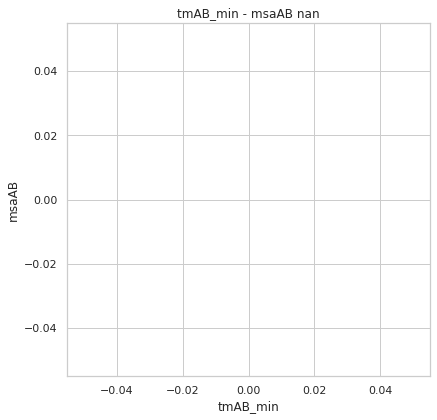

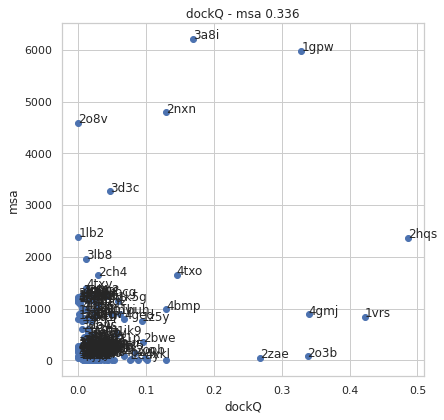

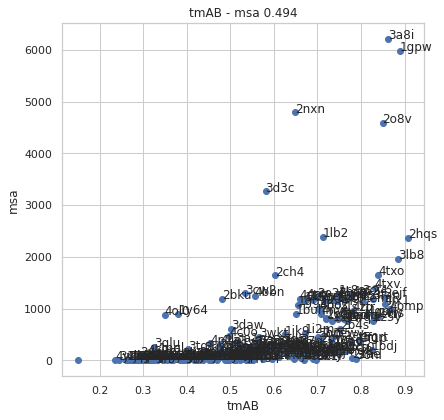

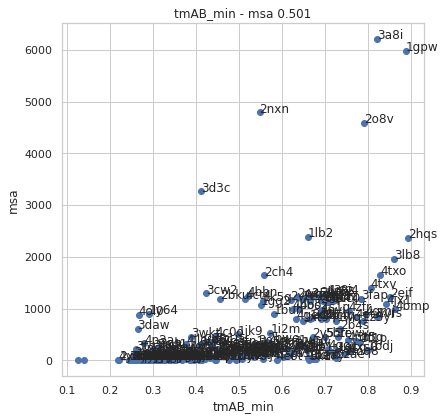

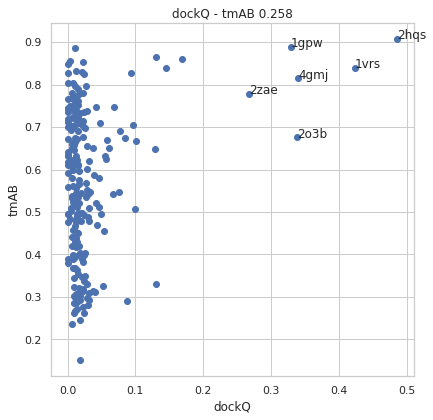

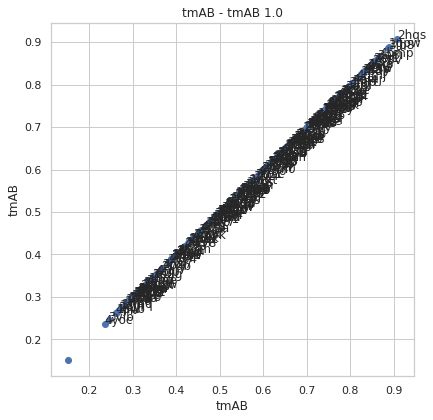

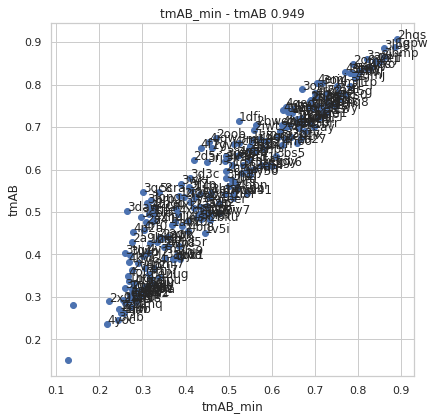

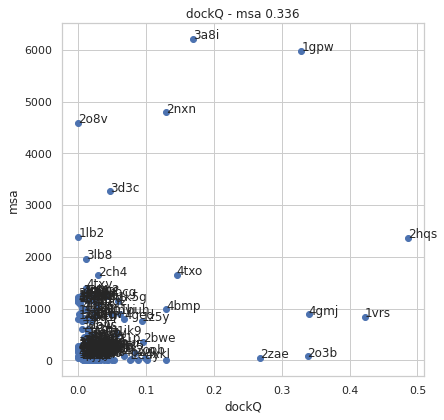

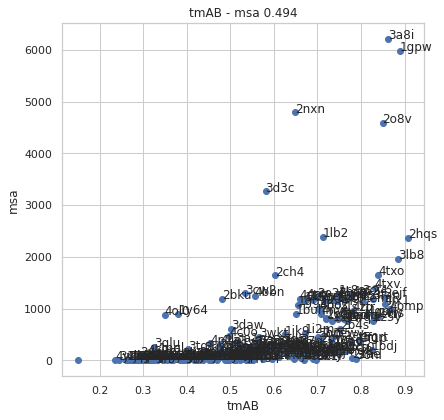

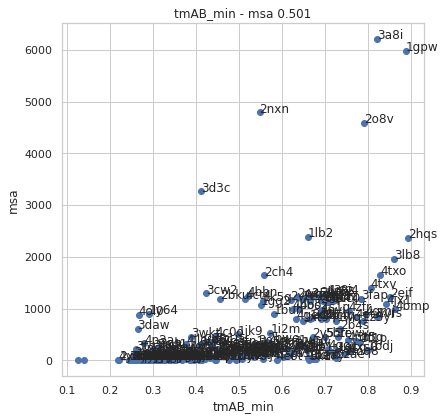

In [78]:
tempdf=data_max['-N 1 -E 1.e-10 --cpu 8 '] 

for y in ["numcorrect","msaAB","msa","tmAB","msa"]:
    for x in ["dockQ","tmAB","tmAB_min","mm",]:
        #print (Name)
         #if (Name != "lenA"):
        #    continue
        xdata=tempdf[x]
        ydata=tempdf[y]
        f, ax = plt.subplots(figsize=(6.5, 6.5))
        plt.scatter(xdata,ydata)
        cc=np.corrcoef(xdata,ydata)
        ax.set_title(x + " - " + y + " " + str(round(cc[0,1],3)))
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        for i, txt in enumerate(tempdf.name):
            sstr=txt[0:4]
            if (xdata[i]>cutoff or ydata[i]>25):
                ax.annotate(sstr, (xdata[i], ydata[i]))
    plt.close()

In [79]:
print (codes)


['2hqs' '2zae' '1vrs' '4gmj' '1gpw' '2o3b' '1ay7' '1v5i' '4xhu' '2d5r'
 '2hrk' '1b27' '2x9a']


In [80]:
import sklearn
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
reg = LinearRegression()


In [ ]:
ydata=df.dockQ

In [ ]:
xdata=df[["lenA","lenB","msa","long","med","longA","medA","longB","medB"]]


In [ ]:
reg.fit(xdata,ydata)

In [ ]:

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)


In [ ]:
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
